# Analysation of Domestic airlines

In [1]:
# importing packages
from pandas import DataFrame, read_csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Dataset preparation

In [2]:
#reading xlsx file into Jupyter notebook
file = 'DomesticAirlines_OnTimePerformance_data.xlsx'
df = pd.read_excel(file)
df.head()

,Route,Departing_Port,Arriving_Port,Airline,Sectors_Scheduled,Sectors_Flown,Cancellations,Departures_On_Time,Arrivals_On_Time,Departures_Delayed,Arrivals_Delayed,Year,Month_Num
0,Adelaide-Brisbane,Adelaide,Brisbane,All Airlines,275,275,0,254,257,21,18,2015,1
1,Adelaide-Canberra,Adelaide,Canberra,All Airlines,70,70,0,63,63,7,7,2015,1
2,Adelaide-Gold Coast,Adelaide,Gold Coast,All Airlines,78,77,1,73,72,4,5,2015,1
3,Adelaide-Melbourne,Adelaide,Melbourne,All Airlines,732,719,13,652,652,67,67,2015,1
4,Adelaide-Perth,Adelaide,Perth,All Airlines,221,221,0,201,208,20,13,2015,1


In [3]:
# types of features in the dataset
df.dtypes

Route                 object
Departing_Port        object
Arriving_Port         object
Airline               object
Sectors_Scheduled      int64
Sectors_Flown          int64
Cancellations          int64
Departures_On_Time     int64
Arrivals_On_Time       int64
Departures_Delayed     int64
Arrivals_Delayed       int64
Year                   int64
Month_Num              int64
dtype: object

In [4]:
#checking for missing values
df.isnull().sum().sum()

0

In [5]:
df.describe()

,Sectors_Scheduled,Sectors_Flown,Cancellations,Departures_On_Time,Arrivals_On_Time,Departures_Delayed,Arrivals_Delayed,Year,Month_Num
count,21744.000000,21744.000000,21744.000000,21744.000000,21744.000000,21744.000000,21744.000000,21744.000000,21744.000000
mean,325.199411,319.589956,5.609455,270.803532,268.373620,48.786424,51.216336,2016.267292,6.089404
std,2246.816650,2208.712288,40.431329,1877.864283,1859.042296,342.821175,361.423216,1.008689,3.480408
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,1.000000
25%,34.000000,33.000000,0.000000,29.000000,29.000000,4.000000,4.000000,2015.000000,3.000000
50%,89.000000,88.000000,0.000000,73.000000,73.000000,11.000000,12.000000,2016.000000,6.000000
75%,173.000000,170.000000,2.000000,143.000000,142.000000,27.000000,28.000000,2017.000000,9.000000
max,50949.000000,49908.000000,1528.000000,43537.000000,43291.000000,10380.000000,11133.000000,2018.000000,12.000000


In [6]:
df.shape

(21744, 13)

13 feature and more than 20000 rows clean data

In [7]:
df.Airline.value_counts()

All Airlines                          5381
Virgin Australia                      4737
QantasLink                            3111
Jetstar                               2869
Qantas                                2657
Tigerair Australia                    1477
Virgin Australia Regional Airlines     831
Regional Express                       681
Name: Airline, dtype: int64

#### All Airlines?

In [8]:
All_airlines_check = df.groupby(['Airline'])['Sectors_Scheduled', 'Departures_Delayed', 'Cancellations'].apply(np.sum).loc[["All Airlines"]]
Other_airlines_check = df.groupby(['Airline'])['Sectors_Scheduled', 'Departures_Delayed', 'Cancellations'].apply(np.sum).drop("All Airlines", axis=0)


print(All_airlines_check)
Other_airlines_check.sum()

              Sectors_Scheduled  Departures_Delayed  Cancellations
Airline                                                           
All Airlines            3535568              530406          60986


Sectors_Scheduled     3535568
Departures_Delayed     530406
Cancellations           60986
dtype: int64

#### All Ports?

Possible meaning of "All Ports-All Ports" 
- Probably the cathegory of All Ports-All Ports" refer to all the other possible arrival/departure ports and airline types in the Austral region. In case of "Route" the smallest amount is 21 any smaller group is possible to considered too small to have a different cathegory
- mistake

#### Yearly data

In [9]:
df.Year.value_counts().head()

2017    6470
2016    6342
2015    6174
2018    2758
Name: Year, dtype: int64

2018 has only data till May, so instead of looking at the years separetly when analysing, 
analisation in line with the time

### Feature engineering

In [10]:
# function to check if the "Departing_Port" and "Arriving_Port" are always the same as the "Route" feature
# because flights can be diverted
# can be used later to check the future data 

def check_route(row):
    if row['Route'] != row['Departing_Port'] + "-" + row['Arriving_Port']:
        return "Route changed"
    else:
        return "Route didn't changed"
    

df['Route_check'] = df.apply(check_route, axis=1)
df['Route_check'].value_counts()

Route didn't changed    21744
Name: Route_check, dtype: int64

In [11]:
# Feature engereering
# creating date

import time
import datetime


def creating_date(row):
    return datetime.datetime(year=row['Year'], month=row['Month_Num'], day=1)
   

df['Date'] = df.apply(creating_date, axis=1)

## Exparatory Data Analysis

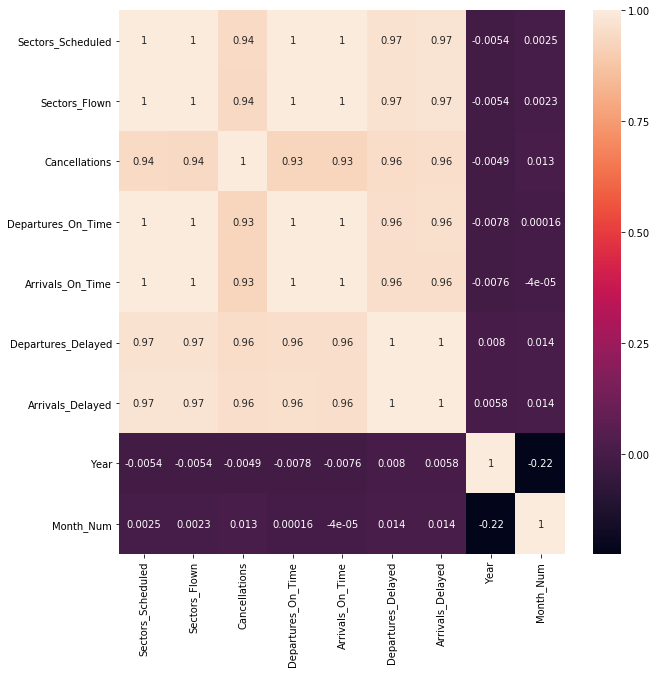

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [13]:
# statistical description of the airlines 

In [14]:
df.groupby(['Airline']).Sectors_Flown.describe()

,count,mean,std,min,25%,50%,75%,max
Airline,,,,,,,,
All Airlines,5381.0,645.713064,4068.683478,25.0,109.0,199.0,321.0,49908.0
Jetstar,2869.0,187.434995,834.830146,12.0,30.0,72.0,114.0,8449.0
Qantas,2657.0,274.446744,1115.410499,1.0,31.0,71.0,185.0,9907.0
QantasLink,3111.0,226.556091,1127.702529,1.0,52.0,96.0,126.0,10647.0
Regional Express,681.0,450.876652,1408.323328,3.0,63.0,88.0,146.0,6880.0
Tigerair Australia,1477.0,121.718348,361.615281,3.0,27.0,42.0,90.0,2654.0
Virgin Australia,4737.0,195.493139,1057.270778,1.0,30.0,51.0,127.0,12646.0
Virgin Australia Regional Airlines,831.0,108.223827,313.083184,2.0,25.0,42.0,68.0,2647.0


Text(0.5,1,'On-time performance of all airlines')

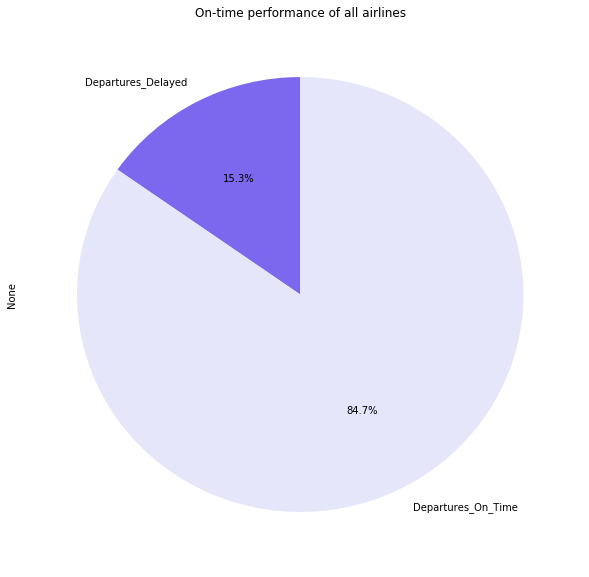

In [15]:
# on time performance of all Airlines
delays_by_airlines = df.groupby(['Airline'])['Departures_Delayed','Departures_On_Time'].apply(np.sum)
delays_by_airlines.loc[["All Airlines"]].apply(np.sum).plot(kind='pie', x= 50, autopct='%1.1f%%',startangle=90, figsize=(10, 10), 
                                                    colors=['mediumslateblue', 'lavender'], subplots=True)
                                                            
plt.title('On-time performance of all airlines')                                                            

In [16]:
# dropping 'All Airlines' in order to see airlines separetly
delays_by_airlines = delays_by_airlines.drop("All Airlines", axis=0)

Text(0.5,1,'On-time performance of all airlines separetly')

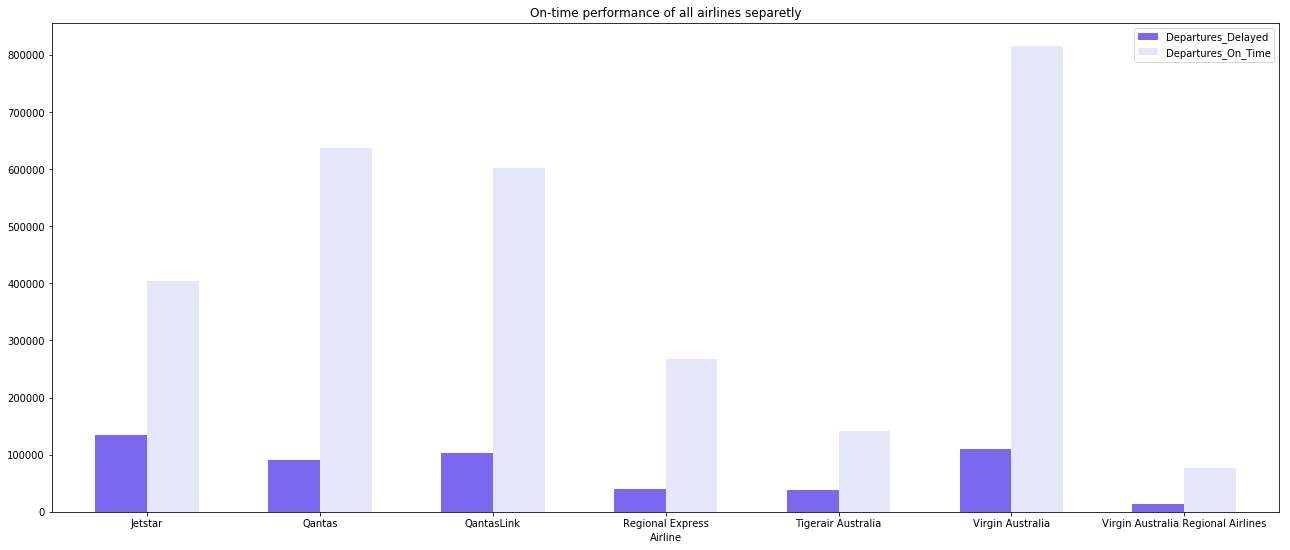

In [17]:
delays_by_airlines.plot(kind='bar', width=0.6,rot=0, figsize=(22, 9), color=['mediumslateblue', 'lavender']);                                                            
plt.title('On-time performance of all airlines separetly') 

Text(0.5,1,'Cancellations by Airlines for all airlines')

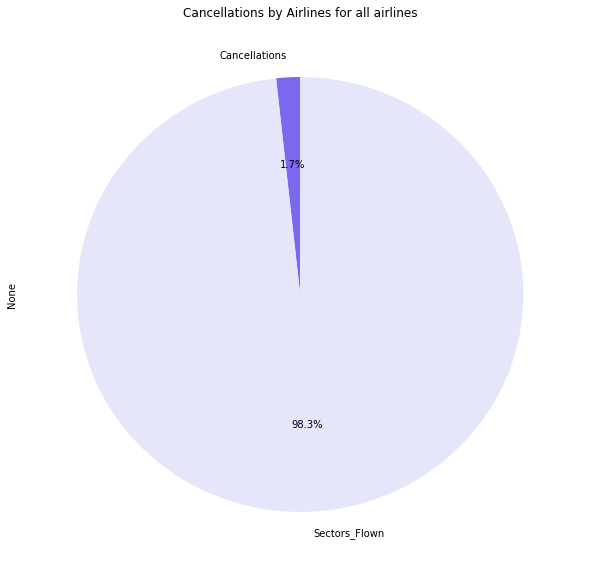

In [18]:
# flown performance of all Airlines
cancellations_by_airlines = df.groupby(['Airline'])['Cancellations','Sectors_Flown'].apply(np.sum)
cancellations_by_airlines.loc[["All Airlines"]].apply(np.sum).plot(kind='pie', x= 50, autopct='%1.1f%%',startangle=90, figsize=(10, 10), 
                                                    colors=['mediumslateblue', 'lavender'], subplots=True)                                                            
plt.title('Cancellations by Airlines for all airlines')                                                            

In [19]:
# dropping 'All Airlines' in order to see airlines separetly
cancellations_by_airlines = cancellations_by_airlines.drop("All Airlines", axis=0)

Text(0.5,1,'Cancellations by Airlines for all airlines separetly')

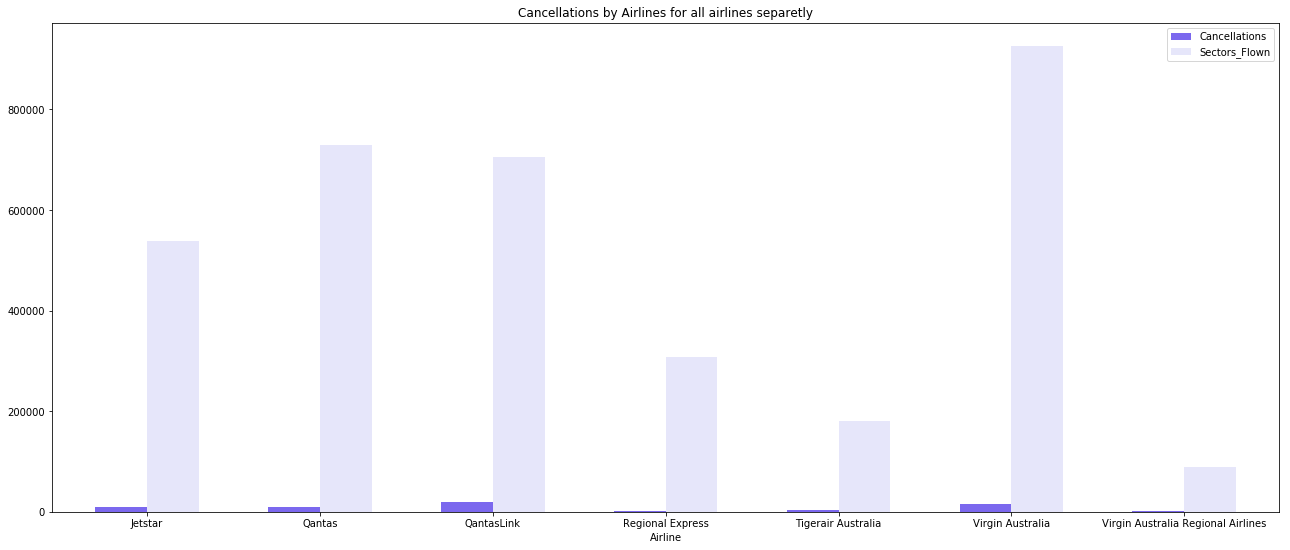

In [20]:
cancellations_by_airlines.plot(kind='bar', width=0.6,rot=0, figsize=(22, 9), color=['mediumslateblue', 'lavender']);
plt.title('Cancellations by Airlines for all airlines separetly')  

In [21]:
# deleting 'All Airlines' from table, it was only useful to do some charts on all the airlines, 
# but I don't need that to be in the table anymore
df = df.set_index("Airline")
df = df.drop("All Airlines", axis=0)

Text(0.5,1,'On-time performance by Airlines')

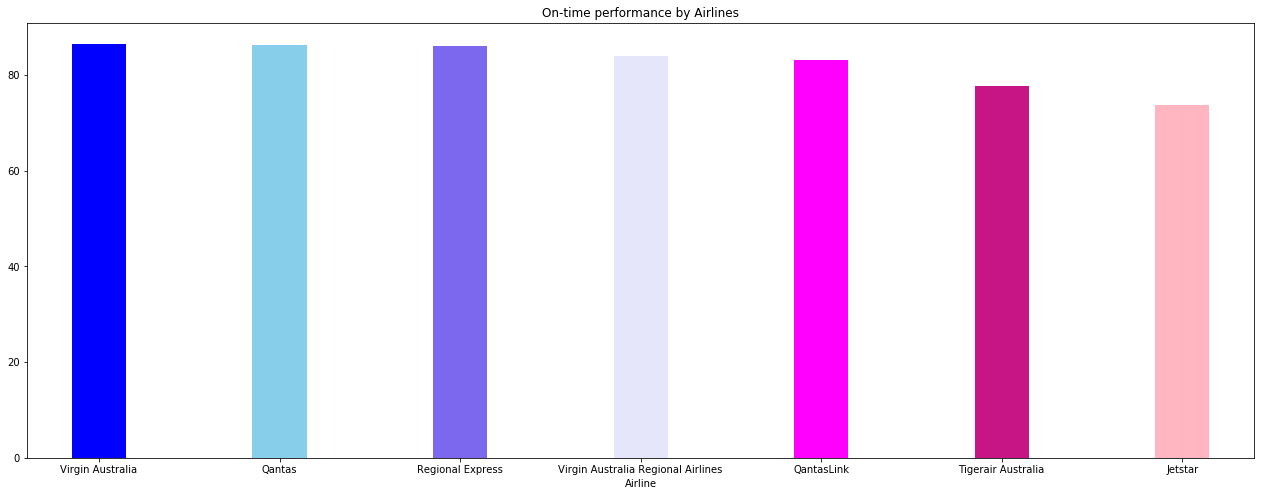

In [22]:
# Airport performance delay

Airlines_On_Time = pd.DataFrame(data=df.groupby('Airline')['Sectors_Scheduled', 'Departures_On_Time'].sum())
Airlines_On_Time['Airlines_perf'] = (Airlines_On_Time.Departures_On_Time / Airlines_On_Time.Sectors_Scheduled) * 100
Airlines_On_Time['Airlines_perf'].sort_values(ascending=False).plot(kind='bar', width=0.3, rot=0, figsize=(22, 8), 
                                            color=['blue', 'skyblue','mediumslateblue', 'lavender',
                                            'magenta', 'mediumvioletred', 'lightpink', 'aqua']);
plt.title('On-time performance by Airlines')

Text(0.5,1,'Flown performance by Airlines')

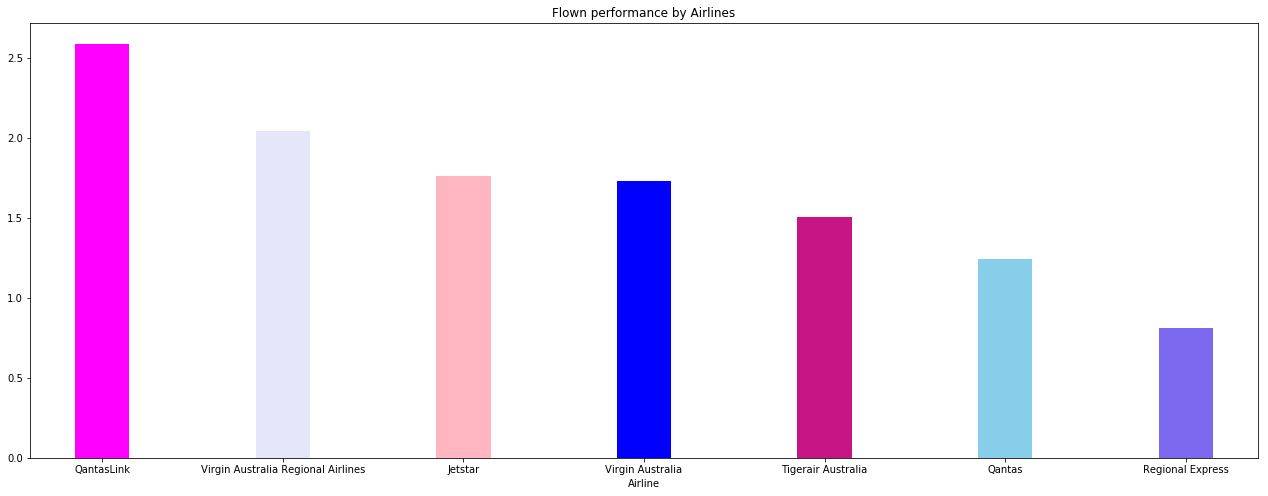

In [23]:
# Cancellation by airlines

Airlines_On_Time = pd.DataFrame(data=df.groupby('Airline')['Sectors_Scheduled', 'Cancellations'].sum())
Airlines_On_Time['Airlines_perf'] = (Airlines_On_Time.Cancellations / Airlines_On_Time.Sectors_Scheduled) * 100
Airlines_On_Time['Airlines_perf'].sort_values(ascending=False).plot(kind='bar', width=0.3, rot=0, figsize=(22, 8), color=[
                    'magenta', 'lavender', 'lightpink', 'blue', 'mediumvioletred','skyblue', 'mediumslateblue']);

plt.title('Flown performance by Airlines')

Text(0.5,1,'Distribution of scheduled flights by Airlines')

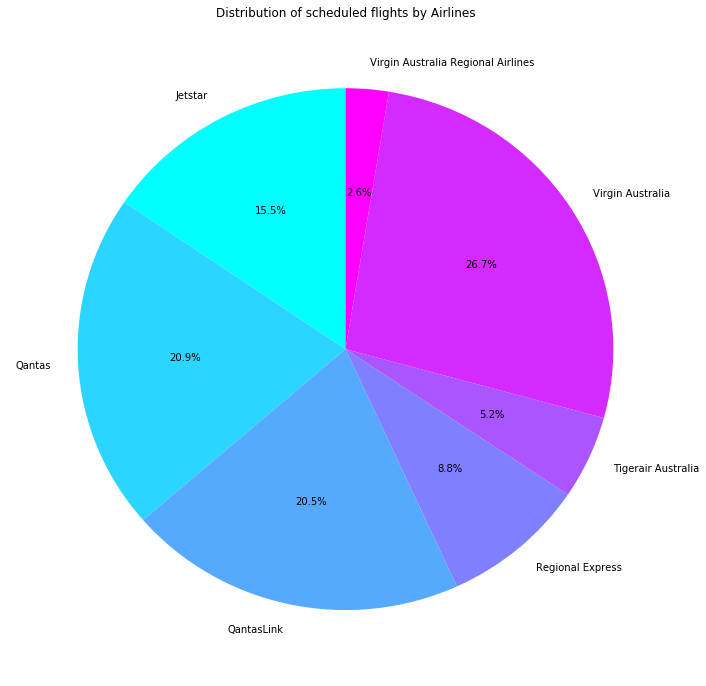

In [26]:
# distribution of scheduled flights
df.groupby(['Airline']).Sectors_Scheduled.apply(np.sum).plot(kind='pie', x= 50, autopct='%1.1f%%', 
                                                         startangle=90, figsize=(12, 12), 
                                                         colormap='cool').set_ylabel('')

plt.title('Distribution of scheduled flights by Airlines')

Text(0.5,1,'Arrival delay compared to departures delay')

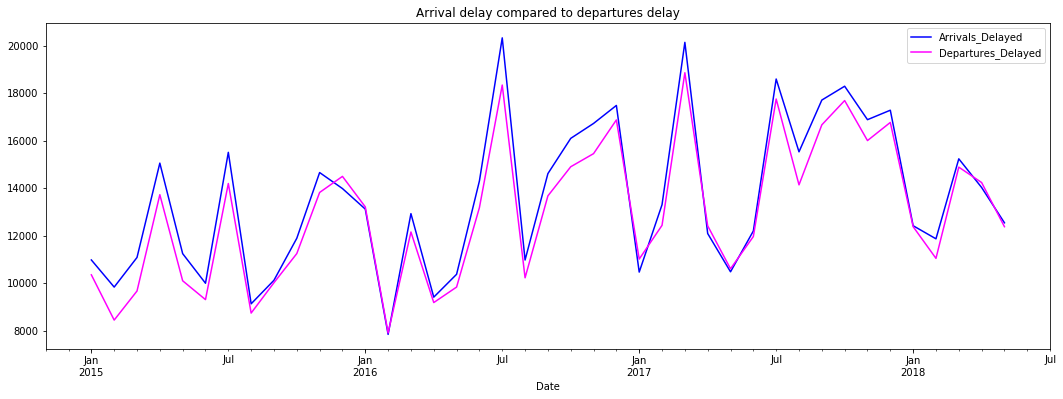

In [27]:
# Plotting delays over time
df.groupby('Date')['Arrivals_Delayed', 'Departures_Delayed'].sum().plot(figsize=(18, 6), color=['blue', 'magenta'])
plt.title('Arrival delay compared to departures delay')

Text(0.5,1,'Departure delay over time')

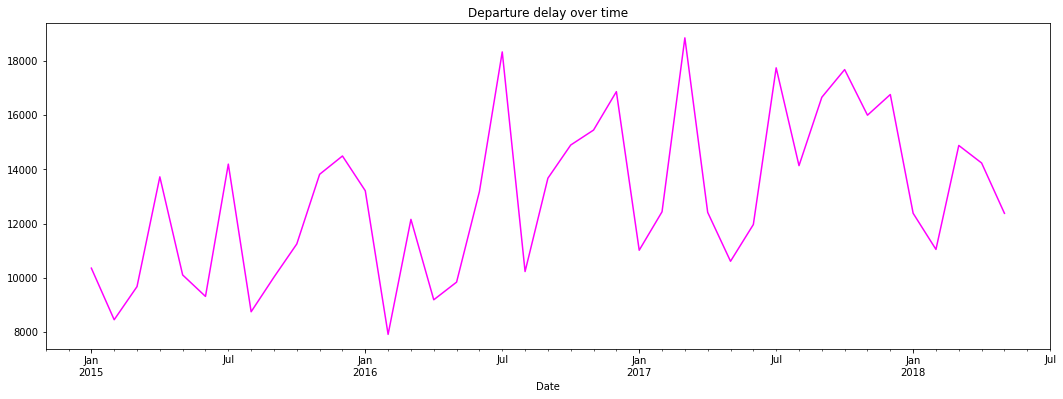

In [28]:
df.groupby('Date')['Departures_Delayed'].sum().plot(figsize=(18, 6),  color=['magenta'])
plt.title('Departure delay over time')

Text(0.5,1,'Cancellations over time')

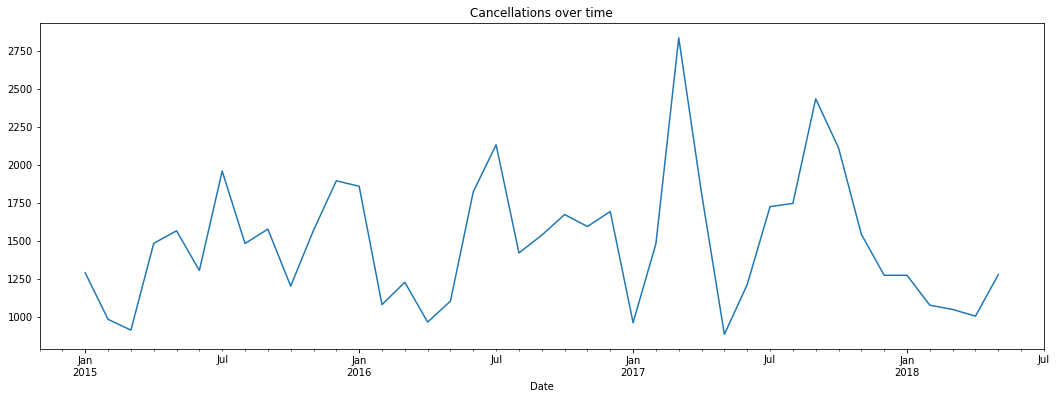

In [29]:
# Plotting cancellations over time
df.groupby('Date')['Cancellations'].sum().plot(figsize=(18, 6))
plt.title('Cancellations over time')

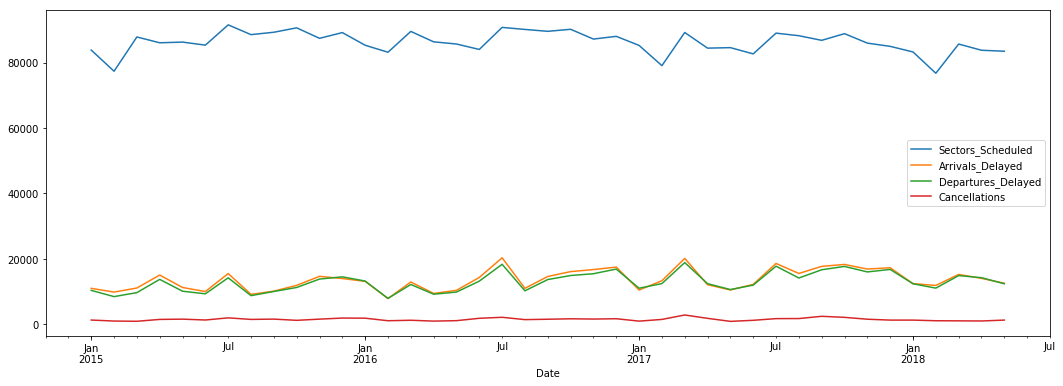

In [30]:
df.groupby('Date')['Sectors_Scheduled', 'Arrivals_Delayed', 'Departures_Delayed', 'Cancellations'].sum().plot(figsize=(18, 6))

Text(0.5,1,'Percentage of departing delays by airports')

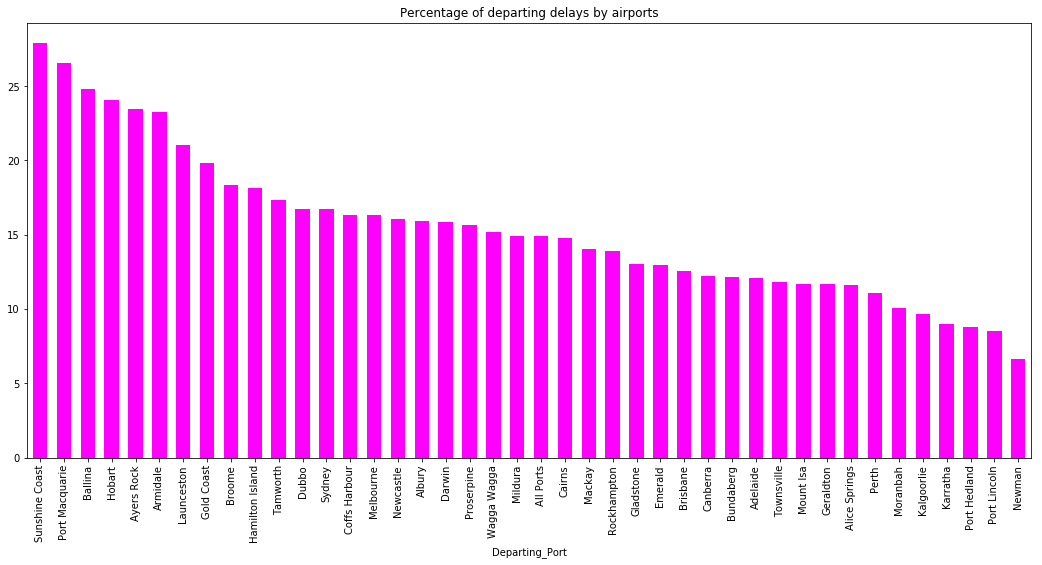

In [31]:
# Airport performance delay

Departing_port_delay = pd.DataFrame(data=df.groupby('Departing_Port')['Sectors_Scheduled', 'Departures_Delayed'].sum())
Departing_port_delay['Departing_port_perf'] = (Departing_port_delay.Departures_Delayed / Departing_port_delay.Sectors_Scheduled) * 100
Departing_port_delay['Departing_port_perf'].sort_values(ascending=False).plot(kind='bar', color=['magenta'], width=0.6, figsize=(18, 8));

plt.title('Percentage of departing delays by airports')

Text(0.5,1,'Percentage of departing delays by routes')

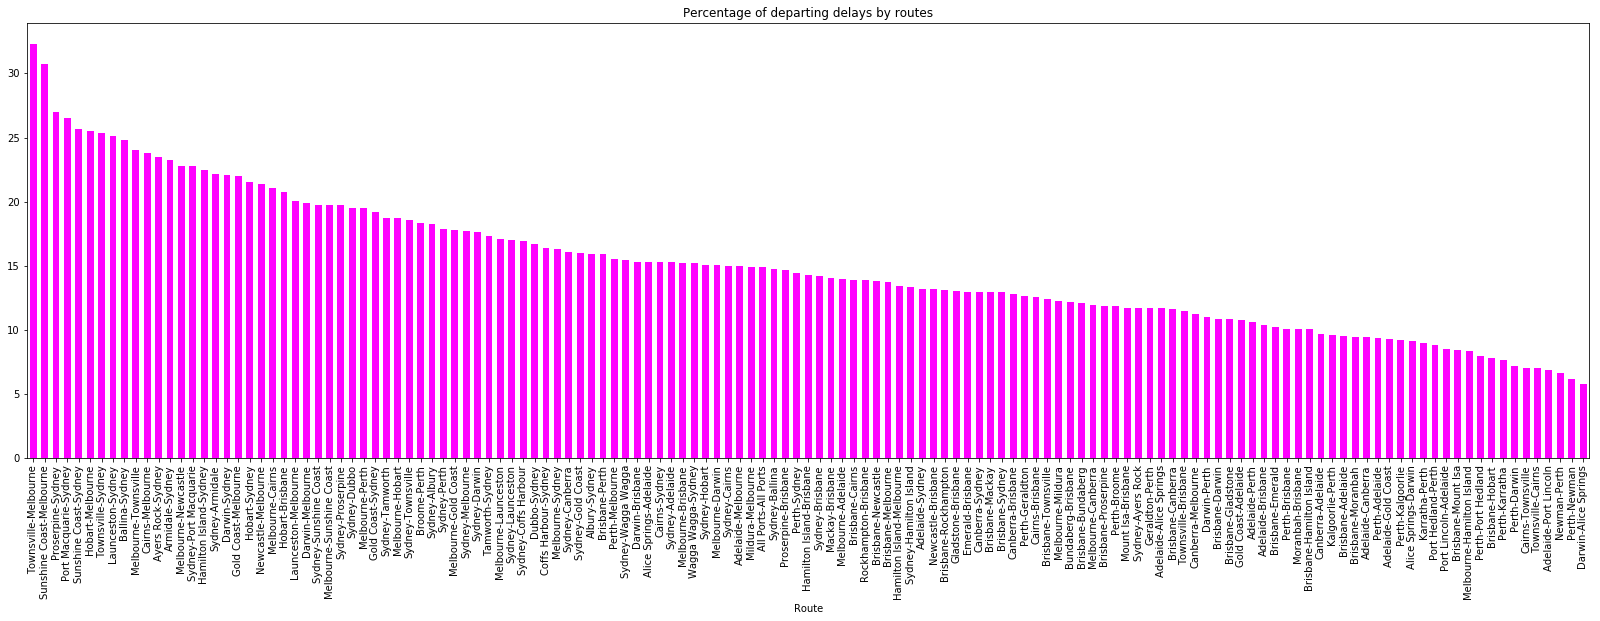

In [32]:
# Route performance delay

Route_delay = pd.DataFrame(data=df.groupby('Route')['Sectors_Scheduled', 'Departures_Delayed'].sum())
Route_delay['Departing_port_perf'] = (Route_delay.Departures_Delayed / Route_delay.Sectors_Scheduled) * 100
Route_delay['Departing_port_perf'].sort_values(ascending=False).plot(kind='bar', color=['magenta'], width=0.6,figsize=(28, 8));

plt.title('Percentage of departing delays by routes')

Text(0.5,1,'Percentage of cancellations by airports')

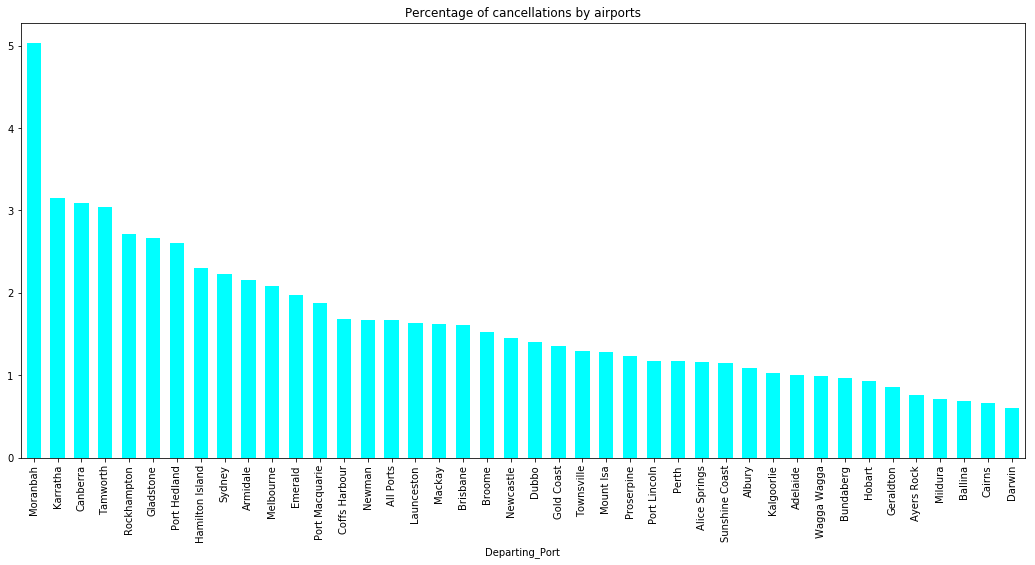

In [33]:
# Airport performance cancellation

Departing_port_canc = pd.DataFrame(data=df.groupby('Departing_Port')['Sectors_Scheduled', 'Cancellations'].sum())
Departing_port_canc['Departing_port_perf'] = (Departing_port_canc.Cancellations / Departing_port_canc.Sectors_Scheduled) * 100
Departing_port_canc['Departing_port_perf'].sort_values(ascending=False).plot(kind='bar',colormap='cool', width=0.6, figsize=(18, 8));

plt.title('Percentage of cancellations by airports')

Text(0.5,1,'Percentage of delays by routes')

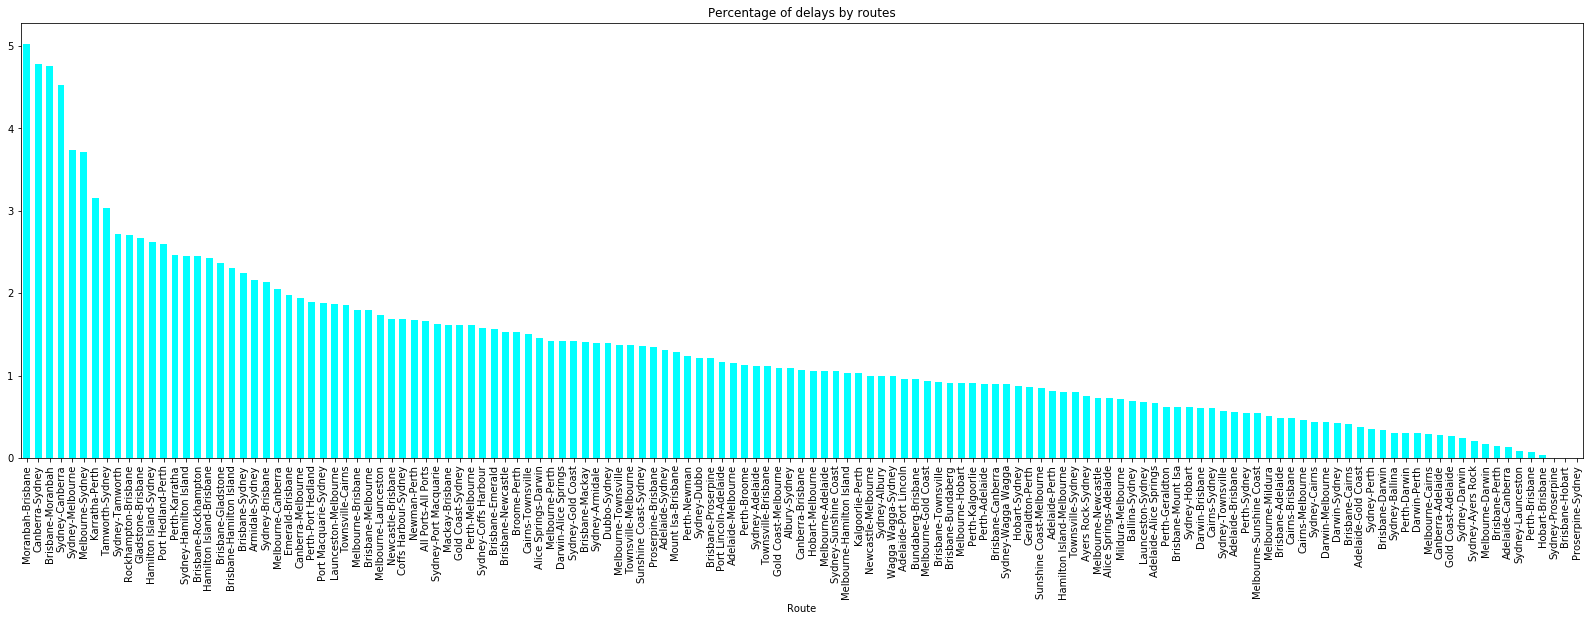

In [34]:
#Route performance cancellation

Route_canc = pd.DataFrame(data=df.groupby('Route')['Sectors_Scheduled', 'Cancellations'].sum())
Route_canc['Departing_port_perf'] = (Route_canc.Cancellations / Route_canc.Sectors_Scheduled) * 100
Route_canc['Departing_port_perf'].sort_values(ascending=False).plot(kind='bar',colormap='cool', width=0.6, figsize=(28, 8));

plt.title('Percentage of delays by routes')

In [35]:
# monthly trends

In [36]:
# deleting '2018' from table to look for patterns in Months
df = df.set_index("Year")
df = df.drop(2018, axis=0)

Text(0.5,1,'Departure delays monthly')

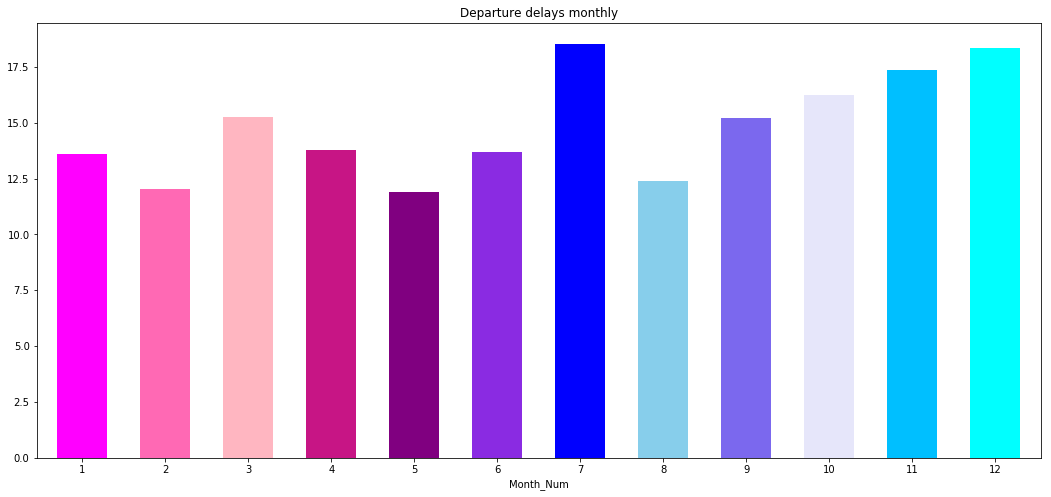

In [37]:
# using the data of 3 years

Montly_departures_delay = pd.DataFrame(data=df.groupby('Month_Num')['Sectors_Scheduled', 'Departures_Delayed'].sum())
Montly_departures_delay['Monthly_perf'] = (Montly_departures_delay.Departures_Delayed / Montly_departures_delay.Sectors_Scheduled) * 100
Montly_departures_delay['Monthly_perf'].plot(kind='bar', width=0.6, figsize=(18, 8), rot=0,color=['magenta', 'hotpink',
                                'lightpink', 'mediumvioletred','purple','blueviolet', 'blue', 
                                'skyblue','mediumslateblue', 'lavender','deepskyblue', 'aqua']);

plt.title('Departure delays monthly')

Text(0.5,1,'Cancellations')

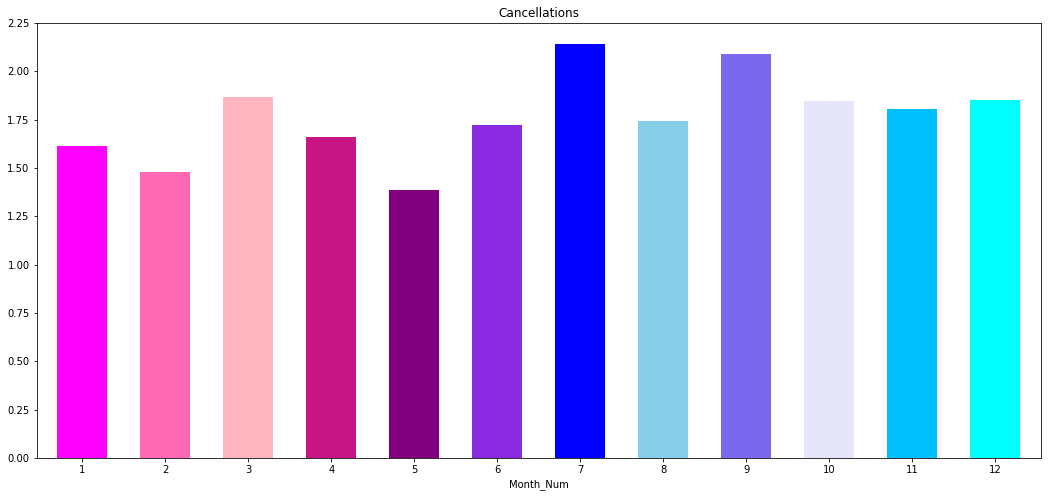

In [38]:
# using the data of 3 years

Monthly_cancellations = pd.DataFrame(data=df.groupby('Month_Num')['Sectors_Scheduled', 'Cancellations'].sum())
Monthly_cancellations['Monthly_perf'] = (Monthly_cancellations.Cancellations / Monthly_cancellations.Sectors_Scheduled) * 100
Monthly_cancellations['Monthly_perf'].plot(kind='bar', width=0.6, figsize=(18, 8), rot=0,color=['magenta', 'hotpink', 
    'lightpink', 'mediumvioletred','purple','blueviolet', 'blue', 
    'skyblue', 'mediumslateblue', 'lavender','deepskyblue', 'aqua']);

plt.title('Cancellations')

Text(0.5,1,'Flights scheduled monthly')

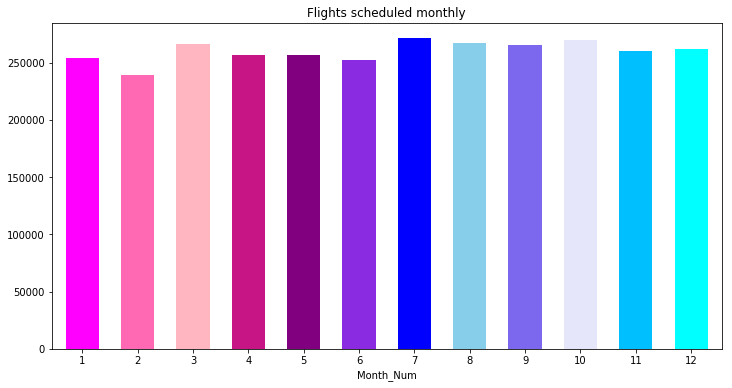

In [39]:
# using the data of 3 years

scheaduled_by_months = df.groupby(['Month_Num']).Sectors_Scheduled.apply(np.sum)
scheaduled_by_months.plot(kind='bar', width=0.6,rot=0,color=['magenta', 'hotpink', 
               'lightpink', 'mediumvioletred','purple','blueviolet', 'blue', 'skyblue',
                'mediumslateblue', 'lavender','deepskyblue', 'aqua'], figsize=(12, 6));

plt.title('Flights scheduled monthly')